In [2]:
import faiss

In [5]:
#takes a long time
d = 2
index = faiss.IndexFlatL2(d) #flat search L2 stands for euclidian distance
index.add(sentence_embeddings) #add your embeddings
xq = model.encode(['hello']) #the index that you want things close to
k = 4 # k nearest neighbors
D, I = index.search(xq, k) #I is the indexes
print(I)

In [ ]:
#partioning is faster / veronoi cells
#speed over accuracy
nlist = 50 # how many veronoi cells
quantizer = fiass.IndexFlatL2(d) # euclid distance code
index = faiss.IndexIVFFlat(quantizer, d, nlist) # this code creates the partitions
    #quantizer is euclid dist, d is dimensions, nlist is how many cells you want

#now you gotta train it
index.train(sentence_embeddings)

#lets retry the time
D, I = index.search(xq, k) #I is the indexes
print(I) #got faster

#at some point this may be inaccurate so to solve this problem you can
index.nprobe = 10
#which just specifices how many veronoi cells around it you want to search in
    #its slowers but more accurate depending on value of index.nprobe

In [ ]:
#product quantization basically mapping things out so it'll be quicker then finding the distance everytime
m = 8 # number of centroids in the final vector ( must be divisor of d )
bits = 8 # number of bits inside the centroids

quantizer = faiss.IndexFlatL2(d) 
index = faiss.IndexIVFPQ(quantizer, d, nlist, m, bits) #IVFPQ

index.train(sentence_embeddings)
index.add(sentence_embeddings)

D, I = index.search(xq, k)
print(I)

In [1]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-d55v62jp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-d55v62jp
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.8 MB/s eta 0:00:00
  Obtaining dependency information for regex from https://files.pythonhosted.org/packages/63/78/ed291d95116695b8b5d7469a931d7c2e83d942df0853915ee504cee98bcf/regex-2023.8.8-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.0/759.0 kB 18.8 MB/s eta 0:00:0000:01
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=ecc6531b74080a09018f35493f3aa506b656d730c61e836833fb4b199163b27d
  Stored in directory: /tmp/pip-ephem

In [1]:
#us pandas to inspect the csv file first
!pip install pandas

In [1]:
!pip3 -qqq install transformers torch datasets
!pip3 -qqq install gdcm
!pip3 -qqq install pydicom
!pip -qqq install faiss-gpu
!pip -qqq install pinecone-client

In [1]:
import os
import faiss
import torch
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import os
#import faiss
import torch
#import skimage
import requests
#import pinecone
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
from io import StringIO
import glob
import clip

In [ ]:
import os
#import faiss
import torch
#import skimage
import requests
#import pinecone
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
from io import StringIO
import glob
import clip

################################# CLIP MODEL ###################################

def get_model_info(model_ID, device):
    model = CLIPModel.from_pretrained(model_ID).to(device)
    processor = CLIPProcessor.from_pretrained(model_ID)
    tokenizer = CLIPTokenizer.from_pretrained(model_ID)
    return model, processor, tokenizer

device = "cuda" if torch.cuda.is_available() else "cpu"
model_ID = "openai/clip-vit-base-patch32"
model, processor, tokenizer = get_model_info(model_ID, device)

################################### IMAGE EMBEDDINGS ########################################

def get_single_text_embedding(text): 
    inputs = tokenizer(text, return_tensors = "pt").to(device)
    text_embeddings = model.get_text_features(**inputs)
     # convert the embeddings to numpy array
    embedding_as_np = text_embeddings.cpu().detach().numpy()
    return embedding_as_np

def get_single_image_embedding(my_image):
    image = processor(text = None, images = my_image, return_tensors="pt")["pixel_values"].to(device)
    #image = processor(text = None, images = my_image, return_tensors="pt").to(device)
    embedding = model.get_image_features(image)
    # convert the embeddings to numpy array
    embedding_as_np = embedding.cpu().detach().numpy()
    return embedding_as_np

# Get the query text
text_query = "stroller"
 
# Get the caption embedding
query_embedding = get_single_text_embedding(text_query).tolist()

print(query_embedding)

image_query = Image.open('/home/hpc-0350/segmented_50000_v4/USD0543419-20070529-D00001_1.png', 'r')
#display(i)

# Get the text embedding
query_embedding = get_single_image_embedding(image_query).tolist()

print(query_embedding)

NameError: name 'size' is not defined

In [28]:
import os
#import faiss
import torch
#import skimage
import requests
#import pinecone
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
from io import StringIO
import glob
import clip

print("Using glob.glob()")
files = glob.glob('/home/hpc-0349/segmented_50000_v4/*.png', recursive = True)
lst = []
for f in files:
    lst.append(f)
image_df = pd.DataFrame(lst, columns = ['img_only'])
image_df.to_csv("imageonly.csv", index = None)

x = 'https://raw.githubusercontent.com/lamps-lab/ImageSearchEngine/main/data/nipseval_50000_original.csv'

r = requests.get(x).text

d = pd.read_csv(StringIO(r), sep = ',')

object_infer = d['object_infer']
_figure_file = d['figure_file']
subfigure_file = d['subfigure_file']

L = []
io = pd.read_csv("imageonly.csv")
for thing in io['img_only']:
    thing = str(thing)
    L.append(thing)

y = []
captions = pd.read_csv('image+captions.csv')
for x in captions['captions']:
    y.append(x)
data = pd.DataFrame(y, columns=['caption'])

Using glob.glob()


In [14]:
import os
#import faiss
import torch
#import skimage
import requests
#import pinecone
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
from io import StringIO
import glob
import clip
#from IPython.display import Image, display

########################### GITHUB CSV ##################################

x = 'https://raw.githubusercontent.com/lamps-lab/ImageSearchEngine/main/data/nipseval_50000_original.csv'

r = requests.get(x).text

d = pd.read_csv(StringIO(r), sep = ',')

object_infer = d['object_infer']
_figure_file = d['figure_file']
subfigure_file = d['subfigure_file']

################################# CLIP MODEL ###################################

def get_model_info(model_ID, device):
    model = CLIPModel.from_pretrained(model_ID).to(device)
    processor = CLIPProcessor.from_pretrained(model_ID)
    tokenizer = CLIPTokenizer.from_pretrained(model_ID)
    return model, processor, tokenizer

device = "cuda" if torch.cuda.is_available() else "cpu"
model_ID = "openai/clip-vit-base-patch32"
model, processor, tokenizer = get_model_info(model_ID, device)

################################### IMAGE EMBEDDINGS ########################################

print("Using glob.glob()")
files = glob.glob('/home/hpc-0349/segmented_50000_v4/*.png', 
                   recursive = True)

def get_single_text_embedding(text): 
    inputs = tokenizer(text, return_tensors = "pt").to(device)
    text_embeddings = model.get_text_features(**inputs)
     # convert the embeddings to numpy array
    embedding_as_np = text_embeddings.cpu().detach().numpy()
    return embedding_as_np

def get_single_image_embedding(my_image):
    image = processor(text = None, images = my_image, return_tensors="pt")["pixel_values"].to(device)
    #image = processor(text = None, images = my_image, return_tensors="pt").to(device)
    embedding = model.get_image_features(image)
    # convert the embeddings to numpy array
    embedding_as_np = embedding.cpu().detach().numpy()
    return embedding_as_np

L = []
io = pd.read_csv("imageonly.csv")
for thing in io['img_only']:
    thing = str(thing)
    L.append(thing)

figs = []
for f in subfigure_file:
    f = str(f)
    figs.append(f)
caps = []
textemb = []
for x in figs:
    index = L.index(x)
    c = object_infer[index]
    caps.append(c)

df['captions']=caps
df.to_csv("iandc.csv", index = None)

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#/home/hpc-0350/segmented_50000_v4/USD0543419-20070529-D00001_1.png
#/home/hpc-0350/segmented_50000_v4/

In [ ]:
####################################################################################

In [30]:
x = 'https://raw.githubusercontent.com/lamps-lab/ImageSearchEngine/main/data/nipseval_50000_original.csv'

r = requests.get(x).text

d = pd.read_csv(StringIO(r), sep = ',')

object_infer = d['object_infer']
_figure_file = d['figure_file']
subfigure_file = d['subfigure_file']

L = []
io = pd.read_csv("imageonly.csv")
for thing in io['img_only']:
    thing = str(thing)
    L.append(thing)

figs = []
for f in subfigure_file:
    f = str(f)
    figs.append(f)
    
caps = []
textemb = []
for x in figs:
    index = L.index(x)
    c = object_infer[index]
    caps.append(c)
    t = get_single_text_embedding(c)
    print(t)
    print('*************************')
    textemb.append(t)
    print(textemb)
    break

df['captions']=caps
df.to_csv("image+captions.csv", index = None)

ValueError: 'USD0884696-20200519-D00001_1.png' is not in list

In [5]:
d = torch.load('text_embeddings (1).pt')
b = np.array(d)
x = b[:,0,:]
index = faiss.read_index("text.index")
queryNum = 70
xq = np.array([ x[queryNum] ])
q = x.shape[1]
xq = np.array([
    x[queryNum]
])
k = 10
D, I = index.search(xq, k)
print(I)
print(D)
###########################################################################################################################################
fn = pd.read_csv('image+captions.csv')
fn1 = pd.read_csv('imageonly.csv')
qi = Image.open(fn['img_path'][queryNum], 'r')
qi = result.resize((200, 200))
display(qi)
for x in I:
    for pic in x:
        print(fn['captions'][pic])
        result = Image.open(fn1['img_only'][pic], 'r')
        result = result.resize((200, 200))
        display(result)

RuntimeError: Error in faiss::FileIOReader::FileIOReader(const char*) at /project/faiss/faiss/impl/io.cpp:67: Error: 'f' failed: could not open text.index for reading: No such file or directory

In [17]:
d = torch.load('image_embeddings.pt')
b = np.array(d)
x = b[:,0,:]
index = faiss.read_index("large.index")
queryNum = 1


Image.open(
xq = np.array([ x[queryNum] ])
q = x.shape[1]
xq = np.array([
    x[queryNum]
])
k = 10
D, I = index.search(xq, k)
print(I)
###########################################################################################################################################
fn = pd.read_csv('imageonly.csv')
fn1 = pd.read_csv('image+captions.csv')
 

for x in I:
    for pic in x:
        result = Image.open(fn['img_only'][pic], 'r')
        result = result.resize((200, 200))
        display(result)
        print(fn1['captions'][pic])

SyntaxError: invalid syntax (1519589658.py, line 10)

In [4]:
import os
#import faiss
import torch
#import skimage
import requests
#import pinecone
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
from io import StringIO
import glob
import clip

In [5]:
def get_model_info(model_ID, device):
    model = CLIPModel.from_pretrained(model_ID).to(device)
    processor = CLIPProcessor.from_pretrained(model_ID)
    tokenizer = CLIPTokenizer.from_pretrained(model_ID)
    return model, processor, tokenizer
path = glob.glob("segmented_50000_v4/USD0796233-20170905-D00002_3.png")
print(path)
def get_single_image_embedding(my_image):
    image = processor(text = None, images = my_image, return_tensors="pt")["pixel_values"].to(device)
    embed = model.get_image_features(image)
    embed_np = embed.cpu().detach().numpy()
    return embed_np
query_image = Image.open(path[0])
query_embedding = get_single_image_embedding(query_image)  
#get the index of path

['segmented_50000_v4/USD0796233-20170905-D00002_3.png']


NameError: name 'processor' is not defined

In [ ]:

#get the index of queryImg
def get_model_info(model_ID, device):
    model = CLIPModel.from_pretrained(model_ID).to(device)
    processor = CLIPProcessor.from_pretrained(model_ID)
    tokenizer = CLIPTokenizer.from_pretrained(model_ID)
    return model, processor, tokenizer
def get_single_image_embedding(my_image):
    image = processor(text = None, images = my_image, return_tensors="pt")["pixel_values"].to(device)
    embed = model.get_image_features(image)
    embed_np = embed.cpu().detach().numpy()
    return embed_np
for img in path:
    query_image = Image.open(img)
    query_embedding = get_single_image_embedding(query_image)   

[[    0 58130 23428 47416]]


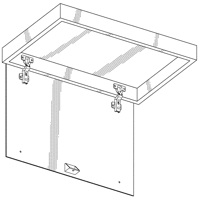

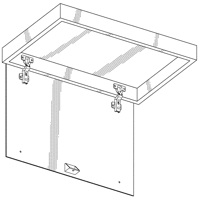

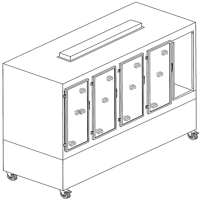

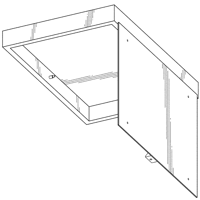

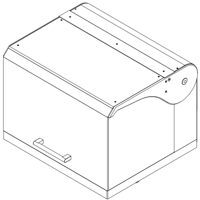

In [15]:
d = torch.load('image_embeddings.pt')
x = np.array(d)
#np.shape(a)
x = b[:,0,:]
np.shape(x)

q = x.shape[1]
q

index = faiss.IndexFlatL2(q)
index.add(x)
index.ntotal

xq = np.array([
    x[0]
])
k = 4
D, I = index.search(xq, k)
print(I)

fn = pd.read_csv('imageonly.csv')
image_query = Image.open(fn['img_only'][0], 'r')
image_query = image_query.resize((200, 200))
display(image_query)
for x in I:
    for pic in x:
        result = Image.open(fn['img_only'][pic], 'r')
        result = result.resize((200, 200))
        display(result)

512

67515

ValueError: too many values to unpack (expected 2)

In [1]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 6.2 MB/s eta 0:00:00
  Obtaining dependency information for pydantic from https://files.pythonhosted.org/packages/82/06/fafdc75e48b248eff364b4249af4bcc6952225e8f20e8205820afc66e88e/pydantic-2.3.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 9.5 MB/s eta 0:00:00
  Obtaining dependency information for sqlalchemy from https://files.pythonhosted.org/packages/ac/d8/51e617a1eb143a48ab2dceb194afe40b3c42b785723a031cc29a8c04103d/SQLAlchemy-2.0.20-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for annotated-types>=0.4.0 from https://files.pythonhosted.org/packages/d8/f0/a2ee543a96cc624c35a9086f39b1ed2aa403c6d355dfe47a11ee5c64a164/annotated_types-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic-core==2.6.3 from https://files.pythonhosted.org/packages/c7/74/900985786e5e7c2e66c396f94009f5a17372b6abbb14c2c080e9a538e

In [8]:
!pip install 'langchain[all]'

  Obtaining dependency information for cohere from https://files.pythonhosted.org/packages/08/e7/a470ee3e491e23874cfd930648a255d0d325168e8f38a51501c3a1557ffe/cohere-4.24-py3-none-any.whl.metadata
  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/ae/59/911d6e5f1d7514d79c527067643376cddcf4cb8d1728e599b3b03ab51c69/openai-0.28.0-py3-none-any.whl.metadata
  Obtaining dependency information for nlpcloud from https://files.pythonhosted.org/packages/9b/0c/efb6d94ae955ce766084c2527775a9cf6e72b92571ccce83a7b26ec6882e/nlpcloud-1.1.44-py3-none-any.whl.metadata
  Obtaining dependency information for elasticsearch from https://files.pythonhosted.org/packages/bb/06/81b1d71ba0567ff39d0f98f3637e810846df92f6733aee46004a194b51ea/elasticsearch-8.9.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 33.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━

In [16]:
from langchain.vectorstores import FAISS

ImportError: cannot import name 'deprecated' from 'typing_extensions' (/opt/conda/lib/python3.7/site-packages/typing_extensions.py)

In [ ]:
####################################################################################

In [ ]:
####################################################################################

In [4]:
d = torch.load('image_embeddings.pt')
a = np.array(d)
#np.shape(a)
x = a[:,0,:]
np.shape(x)

(67515, 512)

In [10]:
embedding = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
x.save_local("vector_db", embeddings = embedding)

AttributeError: 'numpy.ndarray' object has no attribute 'save_local'

In [5]:
d = x.shape[1]
d

512

In [8]:
index = faiss.IndexFlatL2(d)
index.add(x)
index.ntotal

67515

In [11]:
from faiss import write_index, read_index
write_index(index, "large.index")
index = read_index("large.index")

In [9]:
d = torch.load('text_embeddings (1).pt')
a = np.array(d)
x = a[:,0,:]
d = x.shape[1]
d

512

In [11]:
index = faiss.IndexFlatL2(d)
index.add(x)
index.ntotal

67515

In [13]:
from faiss import write_index, read_index
write_index(index, "text.index")
index = read_index("text.index")

In [13]:
#we need a 2d array with dimension 1 by 512
#one row by 512 columns. Because there are 512 dimensions
xq = np.array([
    x[0]
])
k = 4
D, I = index.search(xq, k)
print(I)

[[    0 58130 23428 47416]]


In [13]:
#printing out the similar vectors
[f'{i}: {x[i]}' for i in I[0]]
#next steps
#be able to convert the vectors found into the original images

#connect code with django ( will figure out in meeting monday )
    #bring the query vector stuff in ( Alyssa's code )
    #run it through the search code
    #convert nearest vectors to images
    #display those images

['0: [-4.90708761e-02 -7.82279819e-02  6.91195056e-02 -3.90436083e-01\n  3.90209675e-01 -1.10787749e-02  4.40122366e-01  4.01434809e-01\n -9.89537388e-02  1.39707640e-01  1.97930858e-02 -1.20811611e-01\n  4.82157588e-01 -6.13279156e-02  3.45961809e-01 -4.10456210e-01\n  4.42345202e-01  2.36364752e-01 -5.15936255e-01 -3.99708003e-01\n -8.34540501e-02 -2.42323101e-01  5.74432969e-01  1.02569312e-01\n -2.11373776e-01  8.30342621e-02 -3.72628510e-01  2.27796078e-01\n -2.72760510e-01 -1.26383975e-02 -2.62544096e-01  5.72332680e-01\n -1.94615722e-01  1.98634237e-01  5.38150109e-02 -4.70800459e-01\n -3.12649608e-01 -4.30637002e-01 -2.09480673e-01 -5.59304655e-01\n -1.03331223e-01 -1.77182302e-01  1.73950717e-01 -2.81877756e-01\n  5.81707060e-01 -2.25964236e+00 -2.60265529e-01  2.05519259e-01\n -1.79661185e-01 -1.07085258e-01 -4.09451246e-01  9.75206494e-02\n  4.13912177e-01 -2.73417741e-01 -6.37624145e-01  1.64721817e-01\n -3.55238885e-01 -1.80412427e-01  3.21757168e-01  4.16243464e-01\n  5.8

In [24]:
#0 58130 23428 47416

#/home/hpc-0350/segmented_50000_v4/
fn = pd.read_csv("image+captions.csv")
#res = Image.open(/home/hpc-0350/segmented_50000_v4/'fn[0]')

#for i in fn['img_path']:
#    x = i[0]
#    print(x)

#image_query = Image.open(fn['img_path'][0], 'r')
#result = Image.open(fn[58130], 'r')
#display(result)
#image_query = image_query.resize((200, 200))
#result = result.resize((200, 200))
#display(image_query, result)

for i in fn['img_path']:
    i = Image.open(i)
    display(i)
    break
    

/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/
/


In [4]:
####################################################################################

In [ ]:
nlist = 50
quantizer = faiss.IndexFlatL2(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist)

In [7]:
index.is_trained

False

In [8]:
index.train(x)

In [9]:
index.is_trained

True

In [10]:
index.add(x)
index.ntotal

67515

In [11]:
D, I = index.search(xq, k)
print(I)

[[    0 58130 23428 47416]]


In [8]:
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
#1 encode user query using Clip to a vector
#2 search against the database

In [33]:
image_query = image_data_df.iloc[43].image
# Get the text embedding
query_embedding = get_single_image_embedding(image_query).tolist()

# Run the query
my_index.query(query_embedding, top_k = 4, include_metadata = True)

#convert jupyter notebook to python file
#use matplotlib????

#SEARCH IS WORKING!!!
#using matplotlib?
    #random user query
    #search against database
    #show the result
    
    #text --> image
    #image --> text ( use matplotlib to display result )

NameError: name 'image_data_df' is not defined

In [32]:
import numpy as np
from collections import defaultdict
from typing import List, Tuple

In [30]:
xq = x[0]
k = 4
index = faiss.IndexFlatL2(d)
D, I = index.search(xq, k)
print(I)

ValueError: not enough values to unpack (expected 2, got 1)

In [18]:
#learn make search query
xq = x[0]
#d = x.shape[1]

k = 5
#nlist = 50 # num of veronoi cells
D, I = index.search(xq, k)
print(I)
#quantizer = faiss.IndexFlatL2(d)
#index = faiss.IndexIVFFlat(quantizer, x, nlist) 

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
text_embeddings_dataset = comments_dataset.map(
    lambda x: {"Image Embeddings": get_embeddings(x["Image Embeddings"]).numpy()[0]}
)
text_embeddings_dataset.add_faiss_index(column="embeddings")

In [ ]:
index.train(sentence_embeddings) # train model replace with csv file

In [ ]:
D, I = index.search(xq, k) 
print(I) 

In [ ]:
index = faiss.IndexFlatL2(d)
index.add(image_embeddings_array)

In [9]:
data = pd.read_csv('file.csv', sep = ',', encoding = 'utf-8') 
data

,img_path,image_embeddings
0,/home/hpc-0350/segmented_50000_v4/USD0796233-2...,[[-4.90708761e-02 -7.82279819e-02 6.91195056e...
1,/home/hpc-0350/segmented_50000_v4/USD0658396-2...,[[-4.63975430e-01 -3.82458240e-01 -1.17948472e...
2,/home/hpc-0350/segmented_50000_v4/USD0719880-2...,[[-2.60562003e-01 3.46834548e-02 -2.71175772e...
3,/home/hpc-0350/segmented_50000_v4/USD0659521-2...,[[-3.08056295e-01 -1.17596358e-01 -1.24718457e...
4,/home/hpc-0350/segmented_50000_v4/USD0711860-2...,[[ 6.05874285e-02 -1.61573380e-01 -2.93558896e...
...,...,...
67510,/home/hpc-0350/segmented_50000_v4/USD0713818-2...,[[-1.54493079e-01 -1.48411170e-02 -5.89526057e...
67511,/home/hpc-0350/segmented_50000_v4/USD0636833-2...,[[-2.88965702e-01 3.58197019e-02 -4.30811763e...
67512,/home/hpc-0350/segmented_50000_v4/USD0606458-2...,[[-1.80118978e-01 -1.76831022e-01 -4.44278121e...
67513,/home/hpc-0350/segmented_50000_v4/USD0770034-2...,[[-1.70704976e-01 9.19446349e-04 -2.83476621e...


In [12]:
df1 = data['image_embeddings'].tolist()

In [37]:
import faiss
import numpy as np 

lst = []
#image_embeddings = np.array()
for i in df1[0:3]:
    image_embeddings = i[2:-2]
    lst[i] = image_embeddings

print(lst)

TypeError: list indices must be integers or slices, not str

In [ ]:
import faiss
index = faiss.IndexFlatL2(df1.shape[0])
print(index)

In [8]:
import pandas as pd
import numpy as np
import io

def convert(item):
    item = item[1:-1]    # remove `[ ]`
    item = np.fromstring(item, sep=' ')  # convert string to list
    return item

for i in data['image_embeddings']:
    i.encode()

print(convert(data['image_embeddings'].tolist()))

TypeError: a bytes-like object is required, not 'list'

In [18]:
for i in data['image_embeddings']:
    print(i.shape())

AttributeError: 'str' object has no attribute 'shape'

In [3]:
image_embeddings = data['image_embeddings']
image_embeddings.shape

(67515,)

In [9]:
print(image_embeddings_array.shape)

(67515,)


In [22]:
print(image_embeddings_array.shape[1])

(67515,)


In [10]:
import faiss
index = faiss.IndexFlatL2(image_embeddings_array.shape[0])
print(index)

<faiss.swigfaiss.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7feadfd7b7b0> >


In [11]:
index.is_trained

True

In [16]:
n , d = image_embeddings_array.shape[0]

TypeError: cannot unpack non-iterable int object

In [12]:
index.add(image_embeddings)

ValueError: not enough values to unpack (expected 2, got 1)

In [23]:
image_embeddings_array = image_embeddings_array.reshape(-1, d)
index = faiss.IndexFlatL2(d)
index.add(image_embeddings_array)

ValueError: cannot reshape array of size 67515 into shape (8449)

True

ValueError: not enough values to unpack (expected 2, got 1)

In [26]:
# Build an index
index = faiss.IndexFlatL2(numpy_array)  # Index for L2 (Euclidean) distance

# Add data to the index
index.add(numpy_array)

# Perform a similarity search
query_vector = np.random.rand(1, numpy_array.shape[1]).astype('float32')  # Example query vector
k = 5  # Number of nearest neighbors to retrieve
distances, indices = index.search(query_vector, k)

TypeError: Wrong number or type of arguments for overloaded function 'new_IndexFlatL2'.
  Possible C/C++ prototypes are:
    faiss::IndexFlatL2::IndexFlatL2(faiss::Index::idx_t)
    faiss::IndexFlatL2::IndexFlatL2()


In [2]:
#https://www.pinecone.io/learn/clip-image-search/   use faiss instead of sklearn                                             ##### import #####
import numpy as np
from collections import defaultdict
from typing import List, Tuple

text_embeddings_dataset = comments_dataset.map(
    lambda x: {"Image Embeddings": get_embeddings(x["Image Embeddings"]).numpy()[0]}
)
image_embeddings_dataset = df.map(
    lambda x: {"text": get_embeddings(x["text"]).numpy()[0]}
)
text_embeddings_dataset.add_faiss_index(column="embeddings")
image_embeddings_dataset.add_faiss_index(column="embeddings")

                                                                                            ##### cosine similarity #####
def cosine_similarity(v1: np.ndarray, v2: np.ndarray) -> float:
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

                                                                                           ##### make vector database #####
#class VectorDatabase:
#    def __init__(self):
#        self.vectors = defaultdict(np.ndarray)

#    def insert(self, key: str, vector: np.ndarray) -> None:
#        self.vectors[key] = vector

#    def search(self, query_vector: np.ndarray, k: int) -> List[Tuple[str, float]]:
#        similarities = [(key, cosine_similarity(query_vector, vector)) for key, vector in self.vectors.items()]
#        similarities.sort(key=lambda x: x[1], reverse=True)
#        return similarities[:k]

#    def retrieve(self, key: str) -> np.ndarray:
#        return self.vectors.get(key, None)
                                                                        
#vector_db = VectorDatabase()

                                                                                             ##### add embeddings #####
#vector_db.insert("vector_1", np.array([0.1, 0.2, 0.3])) #replace with the embeddings instead
#vector_db.insert("vector_2", np.array([0.4, 0.5, 0.6]))
#vector_db.insert("vector_3", np.array([0.7, 0.8, 0.9]))

                                                                                             ##### Embedding? #####
#write a block of code that takes the user input and then encode it using openAI clip. 
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"
model = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open("CLIP.png")).unsqueeze(0).to(device) #replace png with user image
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device) #replace array with user text

with torch.no_grad():
    image_features = model.encode_image(image) #user image
    text_features = model.encode_text(text) #user text
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

                                                                                                ##### search #####
    
query_vector = np.array([0.15, 0.25, 0.35]) # replace with search query from the user that needs to be vectorized, search this vector against the database

                                                                                             ##### Added part start #####
xq = model.encode(['hello']) #the search query, replace with search query from the user
k = 4 # KNN
d = 2 # dunno what this is, dimensionality?
nlist = 50 # num of veronoi cells
quantizer = fiass.IndexFlatL2(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist) 
index.train(sentence_embeddings) # train model replace with csv file
D, I = index.search(xq, k) 
print(I) 
# [ index.nprobe = 10 ] can add this later for time efficiency
                                                                                             ##### Added part end #####
# [ similar_vectors = vector_db.search(query_vector, k=2) ] original medium code
# [ print("Similar vectors:", similar_vectors) ] original medium code

# ? retrieved_vector = vector_db.retrieve("vector_1")
# ? print("Retrieved vector:", retrieved_vector)

Similar vectors: [('vector_1', 0.9974149030430576), ('vector_2', 0.9881950691041641)]
Retrieved vector: [0.1 0.2 0.3]


In [ ]:
#create df
import pandas as pd
data = [['Where are your headquarters located?', 'location'],
['Throw my cellphone in the water', 'random'],
['Network Access Control?', 'networking'],
['Address', 'location']]
df = pd.DataFrame(data, columns = ['text', 'category'])

#create vectors from the data
from sentence_transformers import SentenceTransformer
text = df['text']
encoder = SentenceTransformer("paraphrase-mpnet-base-v2")
vectors = encoder.encode(text)

#make the indexes
import faiss

vector_dimension = vectors.shape[1]
index = faiss.IndexFlatL2(vector_dimension)
faiss.normalize_L2(vectors)
index.add(vectors)

#search
import numpy as np

search_text = 'where is your office?'
search_vector = encoder.encode(search_text)
_vector = np.array([search_vector])
faiss.normalize_L2(_vector)

#use ann( all nearest neighbors )
k = index.ntotal
distances, ann = index.search(_vector, k=k)

#search reults
results = pd.DataFrame({'distances': distances[0], 'ann': ann[0]})
merge = pd.merge(results, df, left_on = 'ann', right_index = True)

labels = df['category']
category = labels[ann[0][0]]

In [ ]:
#VECTOR DATABASE NOTES

#embeddings --> indexes --> vector database --> perform searches
#embeddings --> openAI, indexes --> Faiss, vector database --> ?, searching --> Faiss
#Faiss provides vector database, its open source. 

#different types
    #pinecone
    #weaviate
    #chroma
    #redis
    #qdrant
    #milvus
    #vespa

#important for AI long term memory

#we use clip transformer instead of sentence

In [ ]:
#LINKS

#Faiss similarity search
#https://medium.com/loopio-tech/how-to-use-faiss-to-build-your-first-similarity-search-bf0f708aa772
    #step 1 - 4
    #cosine similarity > ann

#vector database
#https://www.linkedin.com/pulse/vector-databases-demystified-part-2-building-your-own-adie-kaye/
    #https://github.com/adiekaye/very-simple-vector-database

#vector database
#https://terminusdb.com/blog/vector-database-and-vector-embeddings/
    #https://github.com/rust-cv/hnsw
    
#euclid dist & manhattan dist
#https://www.youtube.com/watch?v=p3HbBlcXDTE

#cosine simliarty/distance
#https://www.youtube.com/watch?v=ieMjGVYw9ag

#ve
#https://colab.research.google.com/drive/1yRQiyOiPB0I100f0nJ1O0f_jD1rEiJxP?usp=sharing#scrollTo=kIs-1kSxGz4Q

In [ ]:
#QUESTIONS

#how does the vector database connect to the faiss similarity search
    #are we making the vector database and then performing the similarity search using Faiss?
        #if so which type of vector database should we make? ie, pinecone?, chroma?, redis?
    #is faiss making the vector database for us?
    
#which way do we make the vector database?

In [1]:
#can start using faiss once text embedding done. 
#create a vector data base

#get numpy file 
#read the embedding
#pass through the faiss process?
#create vector database 
#similarity search #cosine similarity

#make API
#connect to Django

#write a paper after making the project.
#submit to coference venue.

#save vector database as a file
#fetch the file so you can integrate it into the django website